In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Y_25_75.csv")

In [3]:
spectra = data.iloc[:, :-1]
label = data.iloc[:, -1]
print(label)

0       Corn
1       Corn
2       Corn
3       Corn
4       Corn
        ... 
2395     PAO
2396     PAO
2397     PAO
2398     PAO
2399     PAO
Name: Label, Length: 2400, dtype: object


In [4]:
X_train, X_temp, Y_train, Y_temp = train_test_split(spectra, label, test_size = 0.3, random_state = 69, stratify = label)

X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.5, random_state = 69, stratify = Y_temp)

In [5]:
decisionTree = DecisionTreeClassifier(random_state = 69)
decisionTree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=69)

In [6]:
validation_predict = decisionTree.predict(X_val)

print(classification_report(Y_val,validation_predict))
print("Accuracy", accuracy_score(Y_val, validation_predict))

              precision    recall  f1-score   support

        Corn       0.92      0.90      0.91        60
     E. coli       0.92      0.95      0.93        60
         FAE       0.97      0.95      0.96        60
        MSSA       0.93      0.93      0.93        60
        Malt       0.92      1.00      0.96        60
         PAO       0.98      0.90      0.94        60

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

Accuracy 0.9388888888888889


In [7]:
test_predict =decisionTree.predict(X_test)

print(classification_report(Y_test,test_predict))
print("Accuracy", accuracy_score(Y_test, test_predict))

              precision    recall  f1-score   support

        Corn       0.98      0.93      0.96        60
     E. coli       0.96      0.88      0.92        60
         FAE       0.89      0.97      0.93        60
        MSSA       0.94      0.97      0.95        60
        Malt       0.98      1.00      0.99        60
         PAO       0.97      0.97      0.97        60

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

Accuracy 0.9527777777777777


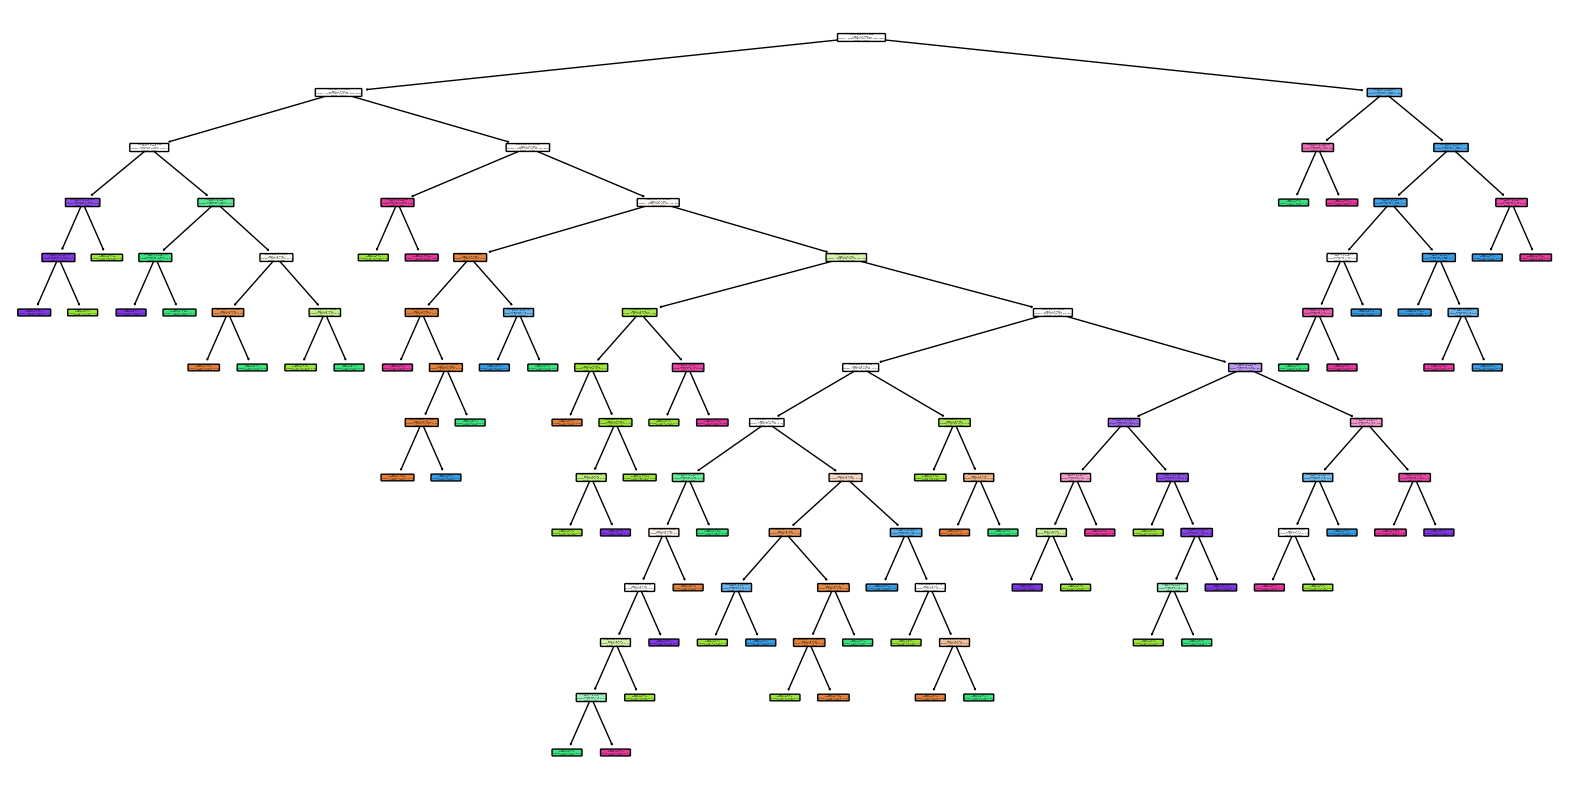

In [8]:
plt.figure(figsize=(20,10))
plot_tree(decisionTree, filled = True, feature_names = spectra.columns, class_names = decisionTree.classes_, rounded = True, proportion = False)
plt.show()